In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as pltfrom
from PythonTsa.LjungBoxtest import plot_LB_pvalue
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from PythonTsa.ModResidDiag import plot_ResidDiag
from scipy import stats
from PythonTsa.datadir import getdtapath

path = "/Users/ruting/Documents/Github/pyTSA/ATSSB_ARMA_and_ARIMA_Modeling_Forecasting"
os.chdir(path)

dtapath=getdtapath()
rat=pd.read_csv(dtapath + 'USbill.csv',header=None)
y=rat[:456]
# leave the last 6 items for forecast comparison
y.rename(columns={0:'time', 1:'bill'},inplace=True)
# ARIMA requires 'strings' for column names.
dates=pd.date_range('1950-1',periods=len(y),freq='M')
y.index=dates
y=y['bill']
ly=np.log(y)
arima617=ARIMA(ly, order=(6,1,7),trend='n').fit(method='innovations_mle')
print(arima617.summary())


/var/folders/yr/yspjm6hj7y35x58mzfqq5lvc0000gn/T/ipykernel_1749/784149038.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.rename(columns={0:'time', 1:'bill'},inplace=True)
/var/folders/yr/yspjm6hj7y35x58mzfqq5lvc0000gn/T/ipykernel_1749/784149038.py:26: UserWarning: Provided `endog` series has been differenced to eliminate integration prior to parameter estimation by method "innovations_mle".
  arima617=ARIMA(ly, order=(6,1,7),trend='n').fit(method='innovations_mle')


                               SARIMAX Results                                
Dep. Variable:                   bill   No. Observations:                  456
Model:                 ARIMA(6, 1, 7)   Log Likelihood                 533.906
Date:                Mon, 14 Apr 2025   AIC                          -1039.813
Time:                        21:25:39   BIC                           -982.129
Sample:                    01-31-1950   HQIC                         -1017.088
                         - 12-31-1987                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0171      0.199      5.117      0.000       0.627       1.407
ar.L2         -0.6343      0.166     -3.821      0.000      -0.960      -0.309
ar.L3         -0.0262      0.096     -0.271      0.7

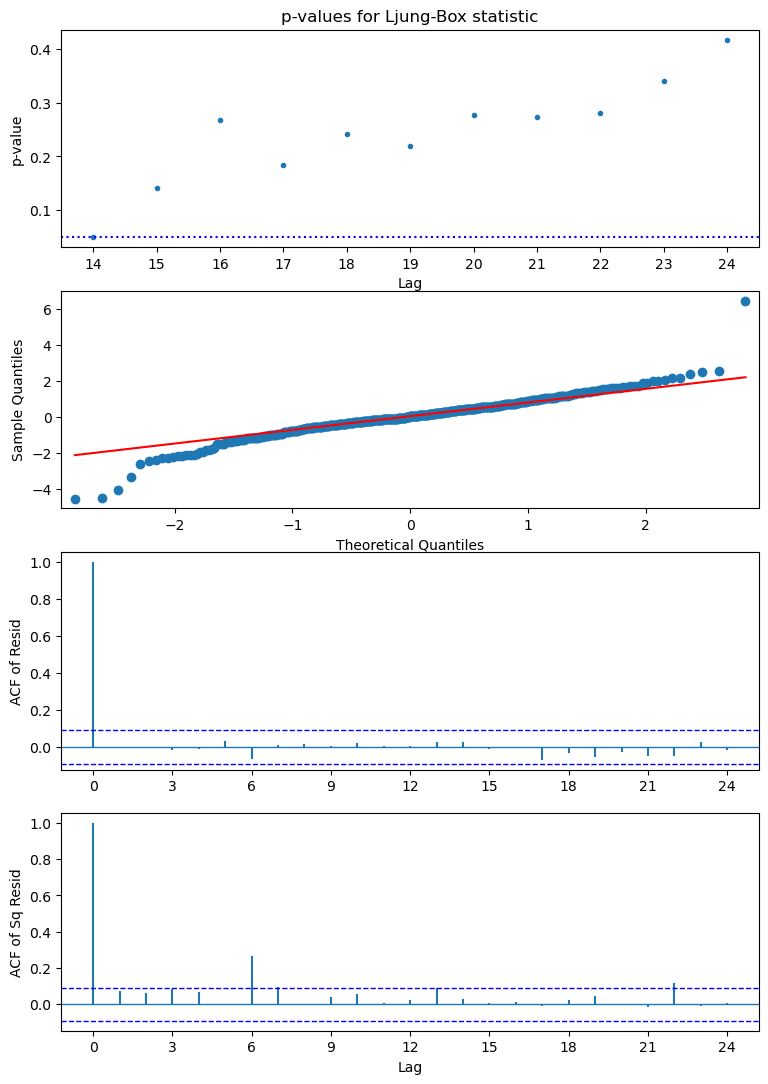

In [2]:

resid617 = arima617.resid
plot_ResidDiag(resid617,noestimatedcoef=13,nolags=24,lag=24)
plt.savefig('Diagnostic_ARIMA.png', dpi = 1200, 
            bbox_inches ='tight', transparent = True)
plt.show()


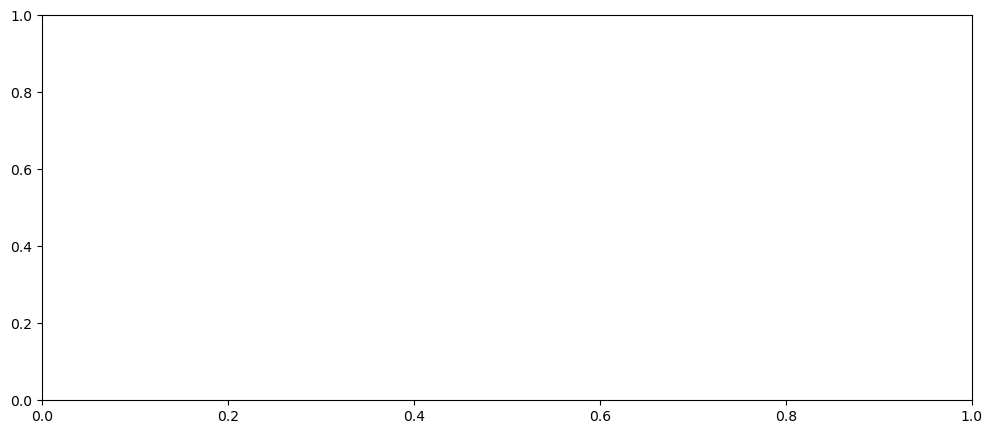

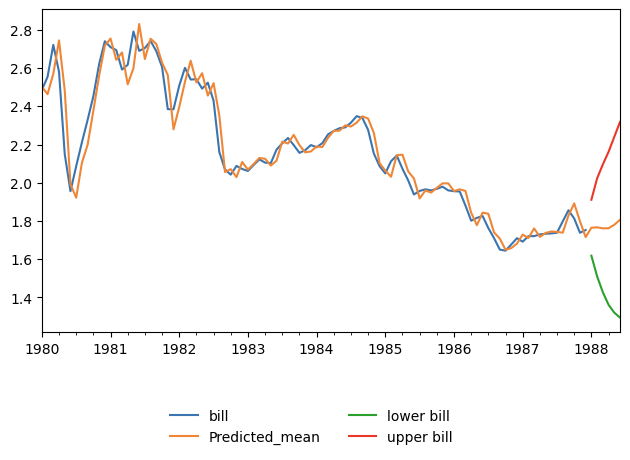

In [3]:

pred=arima617.get_prediction(start='1980-01',end='1988-06')
predicts=pred.predicted_mean
predconf=pred.conf_int()
np.exp(predicts.tail(6))

predframe=pd.concat([ly['1980-01-31':], predicts,
              predconf['1988-01-31':]], axis=1)

colors = {
    "blue": "#3B75AF",
    "red": "#EA3728",
    "green": "#2CA02C",  
    "orange": "#EF8636"
}

fig, ax = plt.subplots(figsize=(12, 5)) 

ax = predframe.plot(color=[colors["blue"], colors["orange"], colors["green"], colors["red"]])

plt.legend(
    ["bill", "Predicted_mean", "lower bill", "upper bill"], 
    loc="upper left", 
    bbox_to_anchor=(0.2, -0.2),
    prop={'size': 10},  
    ncol=2,  
    frameon=False 
)

plt.tight_layout()
plt.savefig('Forcasting_bill.png', dpi = 1200, 
            bbox_inches ='tight', transparent = True)
plt.savefig('Forcasting_bill.eps', 
            dpi=1200, 
            bbox_inches='tight', 
            transparent=False,  
            format='eps')
plt.show()

/var/folders/yr/yspjm6hj7y35x58mzfqq5lvc0000gn/T/ipykernel_1749/1133243247.py:8: UserWarning: Provided `endog` series has been differenced to eliminate integration prior to parameter estimation by method "innovations_mle".
  arima610=ARIMA(ly, order=(6,1,0),trend='n').fit(method='innovations_mle')
/var/folders/yr/yspjm6hj7y35x58mzfqq5lvc0000gn/T/ipykernel_1749/1133243247.py:13: UserWarning: Provided `endog` series has been differenced to eliminate integration prior to parameter estimation by method "innovations_mle".
  arima011=ARIMA(ly, order=(0,1,1),trend='n').fit(method='innovations_mle')


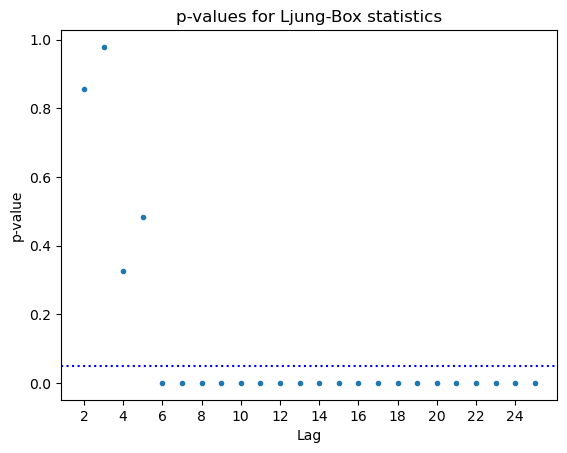

/var/folders/yr/yspjm6hj7y35x58mzfqq5lvc0000gn/T/ipykernel_1749/1133243247.py:21: UserWarning: Provided `endog` series has been differenced to eliminate integration prior to parameter estimation by method "innovations_mle".
  arima016=ARIMA(ly, order=(0,1,6),trend='n').fit(method='innovations_mle')


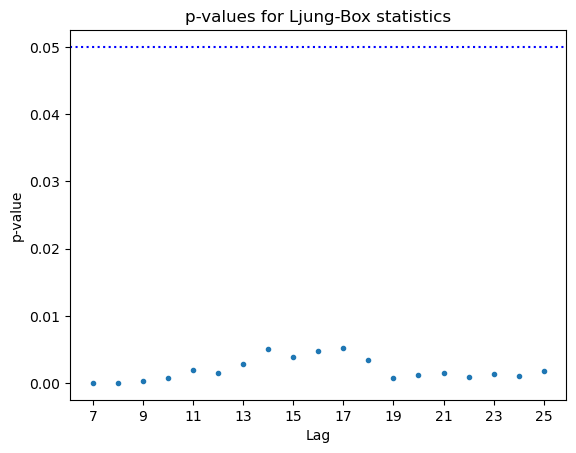

In [5]:

dates=pd.date_range('1950-1',periods=len(rat),freq='M')
rat.index=dates
del rat[0]
from sklearn.metrics import mean_absolute_percentage_error
# firstly install the python package "scikit-learn"
mean_absolute_percentage_error(rat.tail(6), np.exp(predicts.tail(6)))

arima610=ARIMA(ly, order=(6,1,0),trend='n').fit(method='innovations_mle')
pred610=arima610.get_prediction(start='1980-01',end='1988-06')
predicts610=pred610.predicted_mean
mean_absolute_percentage_error(rat.tail(6), np.exp(predicts610.tail(6)))

arima011=ARIMA(ly, order=(0,1,1),trend='n').fit(method='innovations_mle')
plot_LB_pvalue(arima011.resid, noestimatedcoef=1, nolags=25)

plt.savefig('PValue_for_LB_ARIMA011.png', dpi = 1200, 
            bbox_inches ='tight', transparent = True)

plt.show()

arima016=ARIMA(ly, order=(0,1,6),trend='n').fit(method='innovations_mle')
plot_LB_pvalue(arima016.resid, noestimatedcoef=6, nolags=25)
plt.savefig('PValue_for_LB_ARIMA016.png', dpi = 1200, 
            bbox_inches ='tight', transparent = True)
plt.show()

In [6]:
 print(arima617.summary())

                               SARIMAX Results                                
Dep. Variable:                   bill   No. Observations:                  456
Model:                 ARIMA(6, 1, 7)   Log Likelihood                 533.906
Date:                Mon, 14 Apr 2025   AIC                          -1039.813
Time:                        21:27:24   BIC                           -982.129
Sample:                    01-31-1950   HQIC                         -1017.088
                         - 12-31-1987                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0171      0.199      5.117      0.000       0.627       1.407
ar.L2         -0.6343      0.166     -3.821      0.000      -0.960      -0.309
ar.L3         -0.0262      0.096     -0.271      0.7